# Policies definition
Define all policy as a lambda function in dictionnaries

In [1]:
import gym
import pybullet_envs
import numpy as np

def if_then_else(cond, true, false):
    return true if cond else false

GP_policy = {
    "CartPole-v1": lambda s: int(s[3]> -8.44*s[2]),
    "Acrobot-v1": lambda s: np.argmax([s[4], s[4], s[5]]),
    "MountainCarContinuous-v0": lambda s:[if_then_else(abs(s[1])> 0.001, 4.861434963392261, 120.22370232914776)*s[1]],# Version that exploit proteced opérator ( in particular div(s[1],s[1]) used like a bit like Dirac delta function)
    #"MountainCarContinuous-v0": lambda s: [(-36.1658411106967*s[1] + 11.14148115974943)*s[1]],# Version that don't use protected operator as non linearity.
    "Pendulum-v0": lambda s: [s[0] - (9.16*s[2] + 40.14*s[1])/s[0]],
    "InvertedDoublePendulumBulletEnv-v0": lambda s: [-10.7*s[7]],
    "InvertedPendulumSwingupBulletEnv-v0": lambda s: [s[4] + s[3]*6.614633680991087 - s[2] + np.exp(if_then_else(s[3]>-0.7571072906634332, s[1], 15.013603569678889*s[1]))],
    "LunarLanderContinuous-v2": lambda s: [-(2*s[3]+s[1]) - 0.20, -19.77*(s[2]-s[5]*(s[1]+1))],
    "BipedalWalker-v3": lambda s: [s[6], s[7]/s[19], s[22]/s[7] - s[9] + s[0], s[0] - s[11]],
    "HopperBulletEnv-v0": lambda s: [(s[9]+s[7])/(-25.552410848838754*s[5]-11.694385276665386),  s[2] - s[10] + (np.sin(s[13]) - s[12])*s[14] - np.log(s[2])-s[11], -3.173856320619809*s[12]]
}

LinGP_policy = {
    "CartPole-v1": lambda s: int(s[3]> -s[2]-s[1]),
    "Acrobot-v1": lambda s: np.argmax([0,  if_then_else(5.79>s[5], s[5], -s[5]), if_then_else(s[4]<s[5], s[5] + 5.79, 0.0)]),
    "MountainCarContinuous-v0": lambda s: [32.6*s[1]],
    "Pendulum-v0": lambda s: [0.14 - 4.05*s[0]*(4.05*s[1] + s[2])],
    "InvertedDoublePendulumBulletEnv-v0": lambda s: [-11.4*s[7]],
    "InvertedPendulumSwingupBulletEnv-v0": lambda s: [4.80317773*(9.4457828593*s[3] + 2*s[4] + s[1])],
    "LunarLanderContinuous-v2": lambda s: [if_then_else(s[1]>0, -0.5*s[1]-s[3]+0.11, 0), 4*(4*(s[4]-s[0])-s[2])],
    "BipedalWalker-v3": lambda s: [if_then_else(s[3]<s[0], s[15]*s[21], 0.0), if_then_else(s[2]>s[11], np.sin(s[9])/-19.89, s[12]*s[6]), s[17]*s[6], if_then_else(s[18]<s[7], 1.0,if_then_else(0<s[17]*s[6], s[12]/s[16], 0))],
    "HopperBulletEnv-v0": lambda s: [if_then_else(s[13]>0, 0.6146104060912387, 0), s[2]-s[10]-s[11], if_then_else(s[0]-s[3]< s[12], s[0]-s[6]-s[3]-s[7], -3.78765294*s[3]-s[7])]
}

NMCS_policy = {
    "CartPole-v1": lambda s: int(8.0/(s[3]+s[2])> s[2]),
    "Acrobot-v1": lambda s: np.argmax([1, 0, 9.0/s[5]]),
    "MountainCarContinuous-v0": lambda s: [24*s[1]],
    "Pendulum-v0": lambda s: [s[1] - 9.0*s[0]/(s[1]+s[2])],
}


QD_GP_policy = {
    "BipedalWalker-v3":  lambda s : [s[17]*s[18], s[15] - s[6], (s[17]/-4.829122484272009) - s[9], (-0.9309851003020525/(-29.687535240681534*s[1])) - s[11]],
    "HopperBulletEnv-v0": lambda s: [np.sin(np.exp(s[8])), -6.257060739725605*(s[7] + np.sin(s[3]+s[7])), np.sin(np.sin(s[7])-np.sin(s[8])-s[10]*(s[1]-np.log(abs(s[8]*s[3])+0.0001) - 5.860219777510614))]
}

QD_LinGP_policy = {
    "BipedalWalker-v3": lambda s: [if_then_else(s[7]>-0.62, s[4]/-0.62, if_then_else(s[18]<s[5], s[2]*s[20], 0)), s[20]/(s[1]+0.001), s[18]-s[11], 0.3-s[11]],
    "HopperBulletEnv-v0": lambda s: [0.3568142180554972, if_then_else(s[11]>0, if_then_else(s[0]<0, - np.sin(s[7]), 0.0),  s[12] - s[10]) - s[11], if_then_else(s[0]>s[7], 0.3492908874652392, -4.118712031661802*s[3])]
}



### Policies description


__Tree GP and LinearGP policies :__  
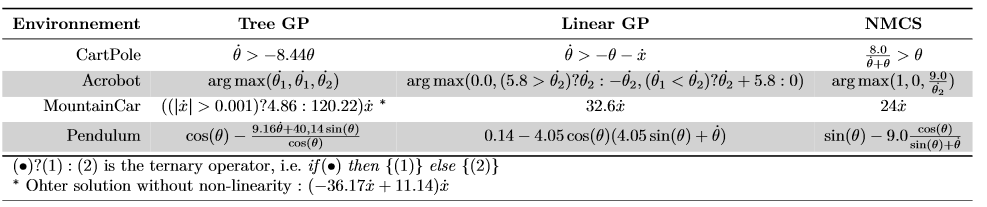

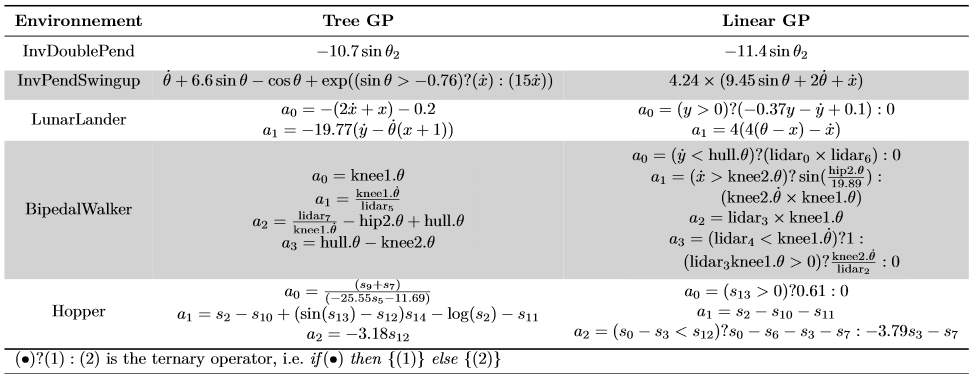

__QD Policies :__
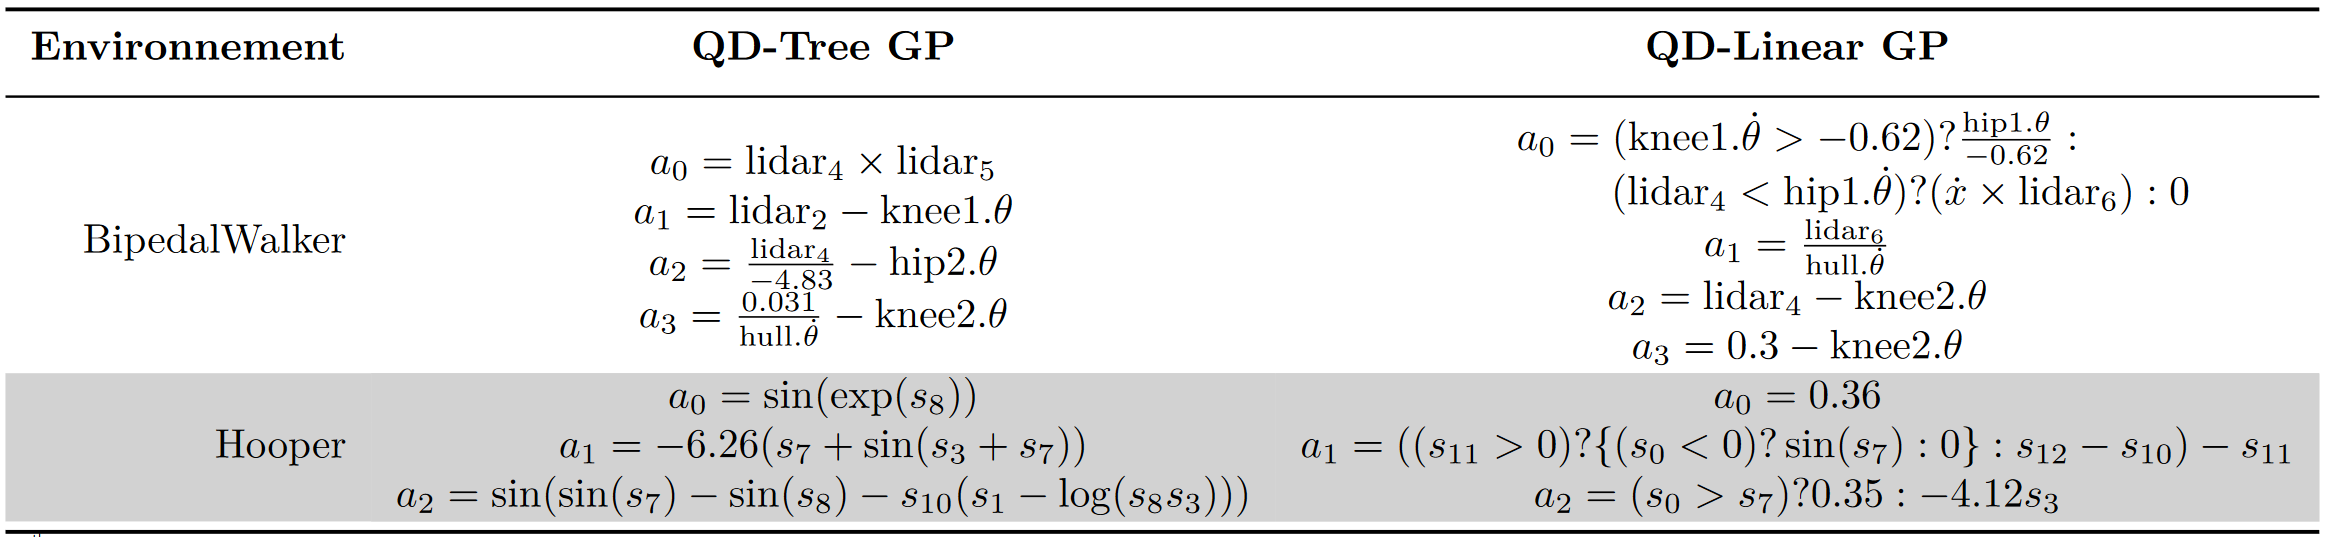

## Simulate a policy on the environment

In [3]:
name = "BipedalWalker-v3"#Environment to test

env = gym.make(name)
#env.seed()

agent = QD_GP_policy[name]#Take the policy from a specific approach

obs = env.reset()

r = 0
for i in range(2000):
  action = agent(obs)
  env.render()
  obs, reward, done, info = env.step(action)
  r+=reward

  if done:
    break
  
env.close()

print("Done : ", done, "cumulative reward : ", r, "Number of steps : ", i+1)

Done :  True cumulative reward :  310.7869826499602 Number of steps :  1392
